In [62]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jul 11 06:02:26 2022

@author: loain
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,mean_absolute_error

path = 'C:/Users/loain/OneDrive/Desktop/data_vis_proj/Stores.csv'


In [2]:
def read_data(path):
    df = pd.read_csv(path)
    return df

def check_nulls (df):
    return df.isnull().values.any() , df.isnull().any().sum()

def check_duplicat(df):
    return df.duplicated().sum()

def corr_data(df):
    df_coor = df.corr()
    plt.plot(df_coor)
    return df_coor

Done LOl


,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Store ID,1.000000,-0.058705,-0.055707,-0.010029,0.071486
Store_Area,-0.058705,1.000000,0.998891,-0.041423,0.097474
Items_Available,-0.055707,0.998891,1.000000,-0.040978,0.098849
Daily_Customer_Count,-0.010029,-0.041423,-0.040978,1.000000,0.008629
Store_Sales,0.071486,0.097474,0.098849,0.008629,1.000000


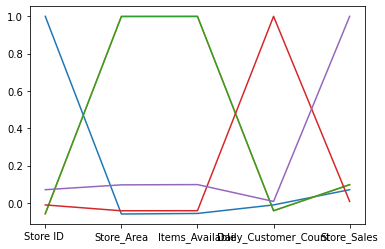

In [4]:
corr_data(read_data(path))

In [51]:
pd.DataFrame(data=dict(read_data(path).dtypes),index=range(0,1))

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,int64,int64,int64,int64,int64


In [130]:
count_uin = []
for i in range(0,len(read_data(path).columns)):
    count_uin.append(len(read_data(path).iloc[:,i].unique()))
count_uin

[896, 583, 616, 130, 816]

In [119]:
count_inf = np.isinf(read_data(path)).sum()
count_inf

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [118]:
count_neg=(read_data(path) < 0).sum()

In [67]:
count_0 = (read_data(path) == 0).sum()
count_0

Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

In [129]:
dff = pd.DataFrame(data = [count_uin,list(dict(count_0).values()),
list(dict(count_neg).values()),list(dict(count_inf).values())]
    ,index=['Distinc','zeros','Negitives','Infinty'],
    columns=read_data(path).columns
    )

In [128]:
dff

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
Distinc,401856,874323,1094986,105490,48320460
zeros,0,0,0,0,0
Negitives,0,0,0,0,0
Infinty,0,0,0,0,0


(array([ 2.,  0.,  1.,  2.,  5.,  4.,  4.,  6.,  7.,  7., 14., 12., 18.,
        23., 32., 24., 27., 18., 33., 28., 36., 35., 55., 45., 47., 38.,
        41., 35., 34., 32., 27., 27., 22., 17., 31., 14., 18., 19., 13.,
        12.,  6.,  8.,  8.,  4.,  2.,  0.,  0.,  1.,  0.,  2.]),
 array([ 775.  ,  804.08,  833.16,  862.24,  891.32,  920.4 ,  949.48,
         978.56, 1007.64, 1036.72, 1065.8 , 1094.88, 1123.96, 1153.04,
        1182.12, 1211.2 , 1240.28, 1269.36, 1298.44, 1327.52, 1356.6 ,
        1385.68, 1414.76, 1443.84, 1472.92, 1502.  , 1531.08, 1560.16,
        1589.24, 1618.32, 1647.4 , 1676.48, 1705.56, 1734.64, 1763.72,
        1792.8 , 1821.88, 1850.96, 1880.04, 1909.12, 1938.2 , 1967.28,
        1996.36, 2025.44, 2054.52, 2083.6 , 2112.68, 2141.76, 2170.84,
        2199.92, 2229.  ]),
 <BarContainer object of 50 artists>)

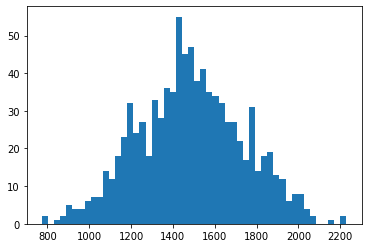

In [58]:
plt.hist(read_data(path).Store_Area,bins=50)

In [50]:
from pandas_profiling import ProfileReport
prof = ProfileReport(read_data(path))

In [52]:
prof.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]
